## <b> Image segmentation using Morphological operations in Python  <b>


### Step 1: Import the required libraries

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt

### Step 2: Upload and Decode the Image

In [3]:
import cv2

img = cv2.imread("bmw.jpg")

if img is None:
    print("Image not found!")


### Step 3: Convert to Greyscale and Blur

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

### Step 4: Apply OTSU's Thresholding

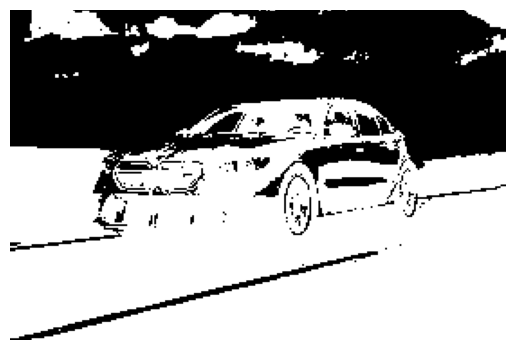

In [5]:
ret, thresh = cv2.threshold(
    gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

### Step 5: Morphological Closing and Background Dilation

In [6]:
kernel = np.ones((9, 9), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=3)

bg = cv2.dilate(closing, kernel, iterations=2)

### Step 6: Contour Filtering and Object Mask Creation

In [7]:
contours, _ = cv2.findContours(
    closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
result = np.zeros(gray.shape, dtype=np.uint8)
for contour in contours:
    if cv2.contourArea(contour) > 1000:
        cv2.fillPoly(result, [contour], 255)

### Step 7: Morphological Opening and Erosion

In [8]:
kernel_open = np.ones((6, 6), np.uint8)
opened_result = cv2.morphologyEx(
    result, cv2.MORPH_OPEN, kernel_open, iterations=2)

kernel_erode = np.ones((9, 9), np.uint8)
final_result = cv2.erode(opened_result, kernel_erode, iterations=2)

### Step 8: Result

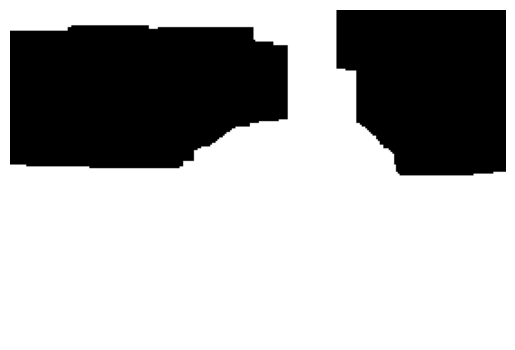

In [9]:
final_result = cv2.erode(opened_result, kernel_erode, iterations=2)
plt.imshow(final_result, cmap='gray')
plt.axis('off')
plt.show()